# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [13]:
# Load pickled data
import pickle

#load other required libraries
import numpy as np
import pandas as pd
import cv2

#Filled this based on where i saved the training and testing data

training_file = "../data/train.p"
validation_file="../data/valid.p"
testing_file ="../data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

#in each file we have images and class_id's which we store seprately
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [22]:
# Number of training examples
n_train = X_train.shape[0]

#Number of validation examples
n_validation = X_train.shape[0]

#Number of testing examples.
n_test =X_valid.shape[0]

#shape of an traffic sign image
image_shape = X_train.shape[1:]

#unique classes in the dataset.
n_classes = len(np.unique(y_train))

#print the information about data set
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 34799
Number of testing examples = 4410
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

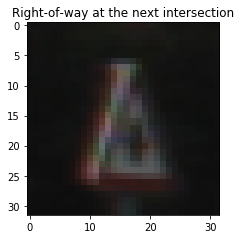

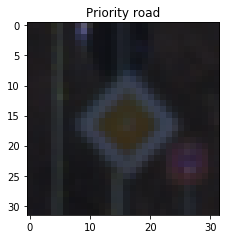

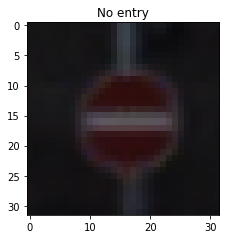

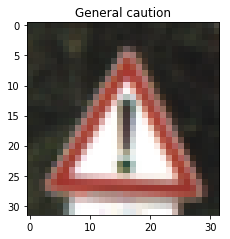

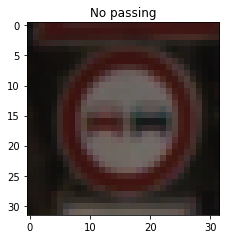

In [15]:
### Data exploration visualization 
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

#created a function to read traffic sign names from the csv file using sign id(given parameter)
def get_sign_name(signId):
    sign_names = pd.read_csv("./signnames.csv",names=["signId","SignName"])
    return sign_names["SignName"][signId]

# display 5 random images from training data set with sign names
for i in range(5):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    plt.figure(figsize=(20,20))
    plt.subplot(1,5,i+1)
    plt.title(get_sign_name(y_train[index]+1))
    plt.imshow(image)

In [16]:
#calculate number of datapoints per class.

# for collections.counter
import collections

# we will use collections.counter which stores elements as dictionary keys and their counts are stored as dictionary values.
train_class_counts = collections.Counter(y_train)
validity_class_counts = collections.Counter(y_valid)
test_class_counts = collections.Counter(y_test)

# print the datapoints per class for the given data sets
print("Training class conunts are : \n {}".format(train_class_counts))
print("\nValidity class conunts are : \n {}".format(validity_class_counts))
print("\nTest class conunts are : \n {}".format(test_class_counts))

Training class conunts are : 
 Counter({2: 2010, 1: 1980, 13: 1920, 12: 1890, 38: 1860, 10: 1800, 4: 1770, 5: 1650, 25: 1350, 9: 1320, 7: 1290, 3: 1260, 8: 1260, 11: 1170, 35: 1080, 18: 1080, 17: 990, 31: 690, 14: 690, 33: 599, 26: 540, 15: 540, 28: 480, 23: 450, 30: 390, 16: 360, 34: 360, 6: 360, 36: 330, 22: 330, 40: 300, 20: 300, 39: 270, 21: 270, 29: 240, 24: 240, 41: 210, 42: 210, 32: 210, 27: 210, 37: 180, 19: 180, 0: 180})

Validity class conunts are : 
 Counter({1: 240, 13: 240, 2: 240, 4: 210, 5: 210, 38: 210, 10: 210, 12: 210, 3: 150, 11: 150, 9: 150, 8: 150, 7: 150, 25: 150, 35: 120, 18: 120, 17: 120, 31: 90, 33: 90, 14: 90, 15: 90, 36: 60, 26: 60, 23: 60, 40: 60, 22: 60, 16: 60, 34: 60, 6: 60, 30: 60, 21: 60, 20: 60, 28: 60, 41: 30, 37: 30, 19: 30, 42: 30, 0: 30, 32: 30, 27: 30, 29: 30, 24: 30, 39: 30})

Test class conunts are : 
 Counter({2: 750, 1: 720, 13: 720, 38: 690, 12: 690, 4: 660, 10: 660, 5: 630, 25: 480, 9: 480, 7: 450, 3: 450, 8: 450, 11: 420, 18: 390, 35: 390, 

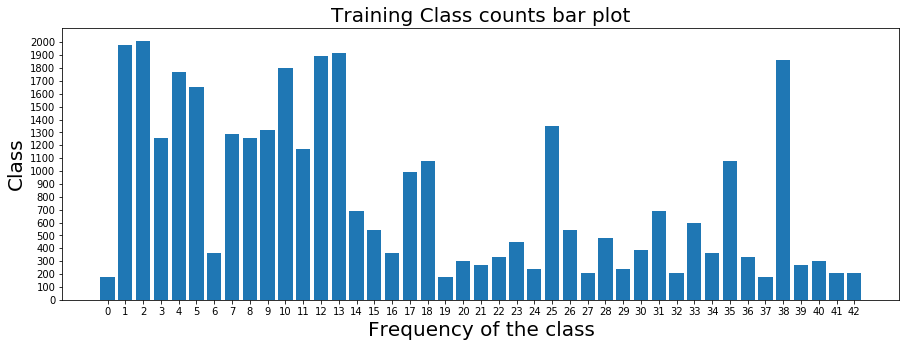

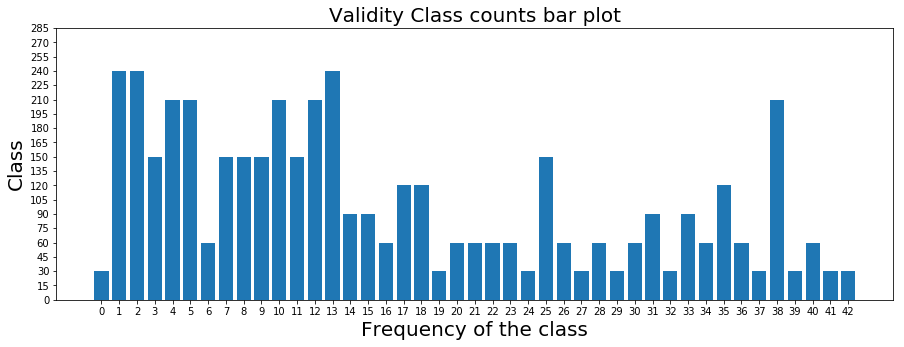

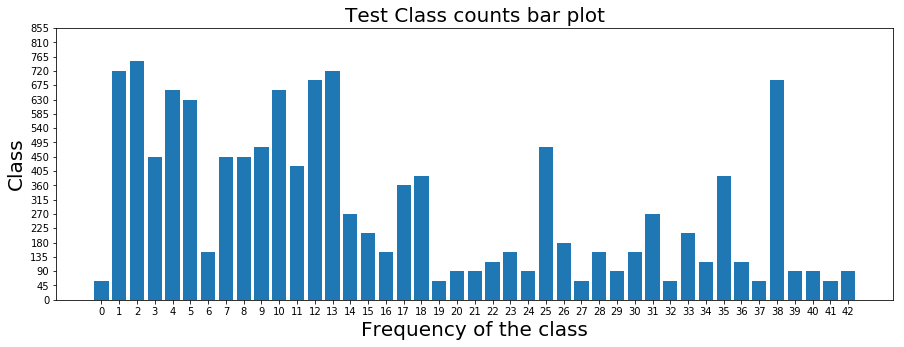

In [12]:
#plot the bar graph for number points per class vs class to analyse the datasets

plt.figure(figsize=(15, 5))
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.xticks(np.arange(0, n_classes, 1))
plt.yticks(np.arange(0, 2100, 100))
plt.title("Training Class counts bar plot", fontsize = 20)
plt.xlabel("Frequency of the class", fontsize = 20)
plt.ylabel("Class", fontsize = 20)
plt.savefig("./bar_plot_training.jpg")
plt.show()

plt.figure(figsize=(15, 5))
plt.bar(validity_class_counts.keys(), validity_class_counts.values())
plt.xticks(np.arange(0, n_classes, 1))
plt.yticks(np.arange(0, 300, 15))
plt.title("Validity Class counts bar plot", fontsize = 20)
plt.xlabel("Frequency of the class", fontsize = 20)
plt.ylabel("Class", fontsize = 20)
plt.savefig("./bar_plot_validation.jpg")
plt.show()

plt.figure(figsize=(15, 5))
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.xticks(np.arange(0, n_classes, 1))
plt.yticks(np.arange(0, 900, 45))
plt.title("Test Class counts bar plot", fontsize = 20)
plt.xlabel("Frequency of the class", fontsize = 20)
plt.ylabel("Class", fontsize = 20)
plt.savefig("./bar_plot_test.jpg")
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [18]:
#adjust values to a comman scale i.e normalization
#by using min-max scaling

def preprocess(image_data, image_label):
    image_data_pre = np.empty_like(image_data).astype(np.float32)
    print(image_data_pre.shape)
    for index in range(len(image_data)):
        image_data_pre[index] = (image_data[index] - np.min(image_data[index]))/(np.max(image_data[index]) - np.min(image_data[index])).astype(np.float32)
    return image_data_pre, image_label

In [19]:
#Normalize all 3 datasets

X_train_p, y_train_p = preprocess(X_train, y_train)
X_valid_p, y_valid_p = preprocess(X_valid, y_valid)
X_test_p, y_test_p = preprocess(X_test, y_test)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [20]:
import pickle

#Function to save data to a file 
def save_data(filename, dictionary):
    with open(filename, "wb") as f:
        pickle.dump(dictionary, f)

In [50]:
#Save all three normalized data sets to a file for later use

train_file = "../data/train_p.p"
valid_file = "../data/valid_p.p"
test_file = "../data/test_p.p"

d_train = {"features":X_train_p, "labels":y_train_p}
d_valid = {"features":X_valid_p, "labels":y_valid_p}
d_test = {"features":X_test_p, "labels":y_test_p}

save_data(train_file, d_train)
save_data(valid_file, d_valid)
save_data(test_file, d_test)

In [51]:
# Function to load the data from a file

import pickle

def load_data(filename):
    with open(filename, "rb") as f:
        data = pickle.load(f)
        X = data["features"]
        y = data["labels"]
    return X, y

#Loading the data sets from the saved files

train_file = "../data/train_p.p"
valid_file = "../data/valid_p.p"
test_file = "../data/test_p.p"

X_train_pre, y_train_pre = load_data(train_file)
X_valid_pre, y_valid_pre = load_data(valid_file)
X_test_pre, y_test_pre = load_data(test_file)

In [52]:
#Shuffling the data
# here we are using the data in batches so we will use shuffling to get all classes while splitting
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train_pre, y_train_pre, random_state = 1)

### Model Architecture

I used LeNet model given in the CNN module of this course.
here we have 5 layers.
*********

used following in few layers:
 
 RELU : rectified linear units. it is a type of activation function

 Dropout:drops some units from network to improve performance of network

 Pooling : to reduce input size and make focus on important data only
 
 Softmax : it is a sigmoid function. Used as output function
*********

The detailed description of each layer is as follows:

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 5x5x3x6   | 1x1 stride, VALID padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 				    |
| Dropout	      	    | With keep probability as 0.8 during training 	|
| Convolution 5x5x6x16	| 1x1 stride, VALID padding, outputs 10x10x16   |
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x6 				    |
| Dropout	      	    | With keep probability as 0.8 during training 	|
| Fully connected		| Flatten layer with 400 input and 120 output   |
| RELU					|												|
| Fully connected		| Flatten layer with 120 input and 84 output    |
| RELU					|												|
| Fully connected		| Flatten layer with 84 input and 43 output     |
| Softmax				|         									    |

In [21]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

#epochs is single forward/backward pass of whole dataset
EPOCHS = 40
BATCH_SIZE = 128

In [67]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    tf.set_random_seed(1)
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, keep_prob)
    
    ####################
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    conv2 = tf.nn.dropout(conv2, keep_prob)
    
    ######################
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    #######################
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    ########################

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

In [68]:
# define tensorflow variables
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob=tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

rate = 0.001

In [69]:
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

#function to evaluate the accuracy
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [71]:
# train the model with training data set
# validating the model to check performance using validation data set

from sklearn.utils import shuffle

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train, random_state = 1)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob:0.8})
        
        # calculate the accuracy of our model in training and validation data sets
        training_accuracy = evaluate(X_train, y_train)
        validation_accuracy = evaluate(X_valid_pre, y_valid_pre)
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    
    #save the model for futher use 
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training Accuracy = 0.860
Validation Accuracy = 0.785

EPOCH 2 ...
Training Accuracy = 0.937
Validation Accuracy = 0.873

EPOCH 3 ...
Training Accuracy = 0.962
Validation Accuracy = 0.902

EPOCH 4 ...
Training Accuracy = 0.971
Validation Accuracy = 0.901

EPOCH 5 ...
Training Accuracy = 0.981
Validation Accuracy = 0.921

EPOCH 6 ...
Training Accuracy = 0.985
Validation Accuracy = 0.927

EPOCH 7 ...
Training Accuracy = 0.989
Validation Accuracy = 0.932

EPOCH 8 ...
Training Accuracy = 0.989
Validation Accuracy = 0.926

EPOCH 9 ...
Training Accuracy = 0.993
Validation Accuracy = 0.936

EPOCH 10 ...
Training Accuracy = 0.993
Validation Accuracy = 0.931

EPOCH 11 ...
Training Accuracy = 0.991
Validation Accuracy = 0.935

EPOCH 12 ...
Training Accuracy = 0.995
Validation Accuracy = 0.942

EPOCH 13 ...
Training Accuracy = 0.996
Validation Accuracy = 0.937

EPOCH 14 ...
Training Accuracy = 0.996
Validation Accuracy = 0.931

EPOCH 15 ...
Training Accuracy = 0.997
Valid

In [72]:
# test the model with test data set
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('./lenet.meta'))
    saver.restore(sess, "./lenet")
    train_accuracy = evaluate(X_train_pre, y_train_pre)
    validation_accuracy = evaluate(X_valid_pre, y_valid_pre)
    test_accuracy = evaluate(X_test_pre, y_test_pre)
    print("Train Accuracy = {:.3f}".format(train_accuracy))
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))
    print("Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Train Accuracy = 1.000
Validation Accuracy = 0.952
Test Accuracy = 0.947


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [151]:
# i downloaded few images from web and named them according to thier class id
import os
import matplotlib.image as mpimage
new_labels = []
def get_user_images(folder):
    images = []
    
    for filename in os.listdir(folder):
        if filename.split('.')[1]!='jpg':
            continue
        img = mpimage.imread(os.path.join(folder,filename))
        if img is not None:
            img = cv2.resize(img,(32,32))
            #print(img.shape)
            images.append(img)
            new_labels.append(filename.split('.')[0])
    return images
images = get_user_images("new_images/")
print("Total ",len(images),"images fetched")
new_images = np.stack(images)
new_labels = np.stack(new_labels)

Total  6 images fetched


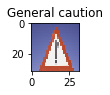

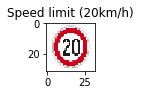

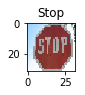

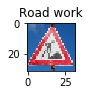

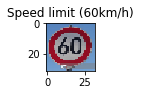

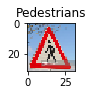

In [152]:
new_labels = [int(i) for i in new_labels]
# display the images with their class names
for i in range(len(new_images)):
    plt.figure(figsize=(5,5))
    plt.subplot(2,5,i+1)
    
    #get_sign_name is a function that i created earlier in exploratory visualization section
    plt.title(get_sign_name(new_labels[i]+1))
    plt.imshow(new_images[i],cmap="gray")

In [153]:
X_new_image = np.array(new_images)
y_new_image = np.array(new_labels).astype(np.int8)

In [154]:
new_image_file = "../data/new_image.p"
new_image_dict = {"features":X_new_image, "labels":y_new_image}

save_data(new_image_file, new_image_dict)

In [155]:
X_new_image, y_new_image = load_data(new_image_file)

### Predict the Sign Type for Each Image

In [156]:
X_new_image_p, y_new_image_p = preprocess(X_new_image, y_new_image)

(6, 32, 32, 3)


### Analyze Performance

In [157]:
### Calculate the accuracy for these 5 new images. 
with tf.Session() as sess:
    #saver.restore(sess, tf.train.latest_checkpoint('./lenet.meta'))
    saver.restore(sess, "./lenet")
    new_image_accuracy = evaluate(X_new_image_p, y_new_image)
    
    print("New Image Accuracy = {:.3f}".format(new_image_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
New Image Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [158]:
feed_dict = {x: X_new_image_p, y: y_new_image_p, keep_prob: 1}
with tf.Session() as sess:
    saver.restore(sess, "./lenet")
    predictions = sess.run(logits,feed_dict = feed_dict)
    softmax = sess.run(tf.nn.softmax(predictions))
    top5_pred = sess.run(tf.nn.top_k(softmax, 5))
    #print(top5_pred)
    print(top5_pred)

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  9.99920130e-01,   7.92965511e-05,   4.16749941e-07,
          2.23894133e-07,   3.36002615e-11],
       [  1.00000000e+00,   1.34555433e-08,   8.08149880e-10,
          3.26680414e-13,   8.30156155e-15],
       [  9.98888433e-01,   5.73525496e-04,   3.08438699e-04,
          1.90837542e-04,   1.14168752e-05],
       [  9.99996305e-01,   2.72297007e-06,   4.07797643e-07,
          1.67195353e-07,   1.15141717e-07],
       [  9.32309747e-01,   6.52057752e-02,   2.45754258e-03,
          2.09636783e-05,   3.75821833e-06],
       [  9.99392271e-01,   5.96193539e-04,   1.12378984e-05,
          3.23807200e-07,   2.52687316e-09]], dtype=float32), indices=array([[18, 26, 27, 24, 11],
       [ 0,  1,  8, 31,  4],
       [14, 13,  5, 25, 12],
       [25, 22,  5,  1,  2],
       [ 3,  5,  2, 31, 25],
       [27, 18, 11, 24, 26]], dtype=int32))


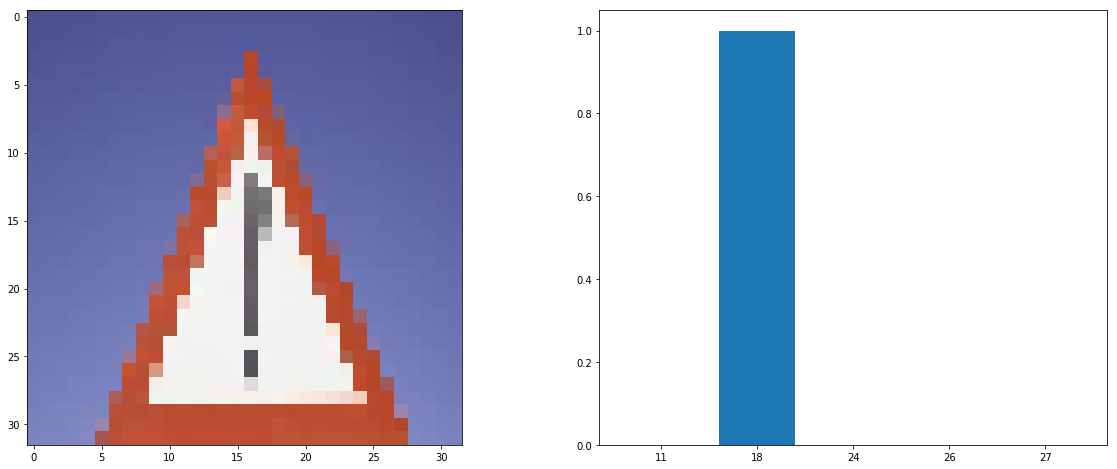

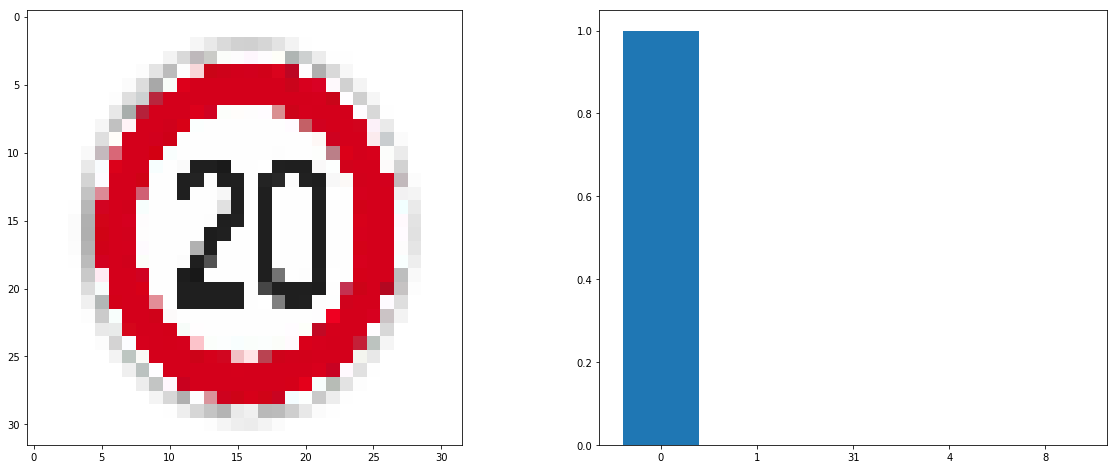

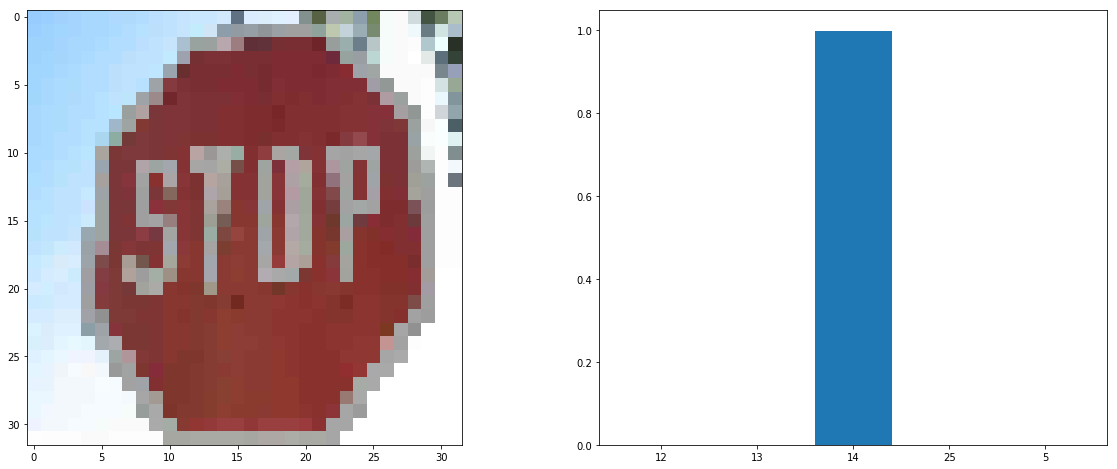

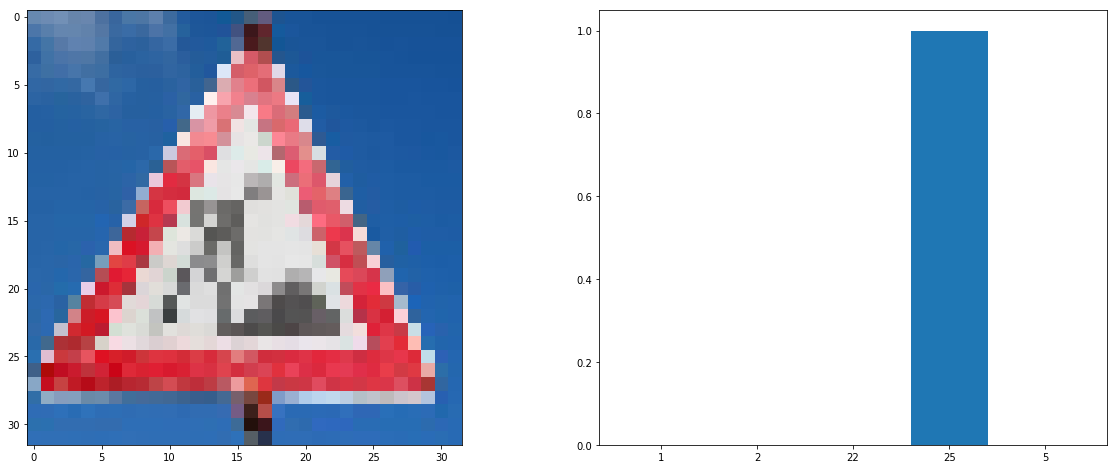

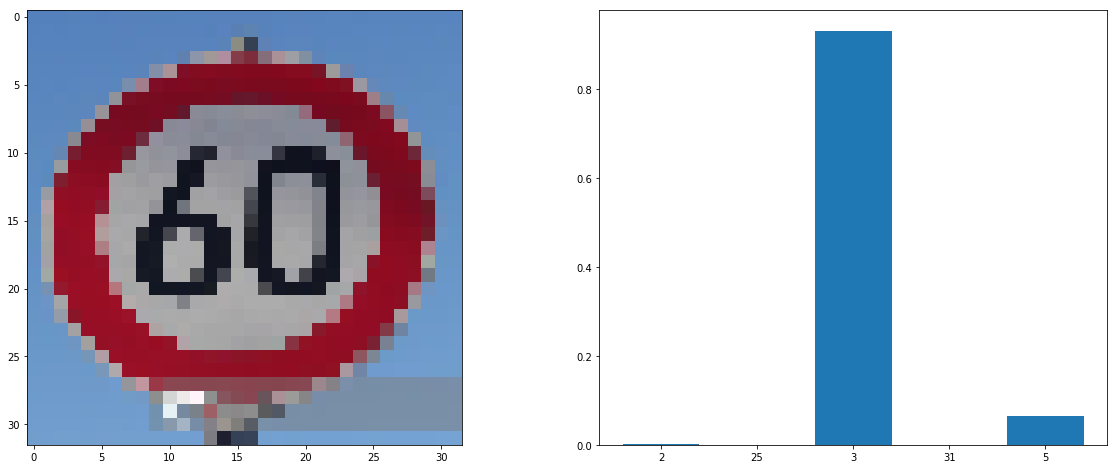

In [159]:
top5_pred[0][1]

for i in range(5):
    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    
    plt.imshow(X_new_image[i])
    
    plt.subplot(1, 2, 2)
    plt.bar(top5_pred[1][i].astype(np.character), top5_pred[0][i])
    #plt.xticks(np.arange(0, 43, 1))
    #plt.yticks(np.arange(0, 1, 0.01))
    plt.savefig("./probability" + str(i+1) + ".jpg")
    plt.show()
    

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

# **Traffic Sign Recognition** 

## Writeup
[image1]: ./my_images/random/1.png
[image2]: ./my_images/random/2.png
[image3]: ./my_images/random/3.png
[image4]: ./my_images/random/4.png
[image5]: ./my_images/random/5.png
[image6]: ./my_images/bar/1.png
[image7]: ./my_images/bar/2.png
[image8]: ./my_images/bar/3.png
[image9]: ./new_images/0.jpg
[image10]: ./new_images/14.jpg
[image11]: ./new_images/18.jpg
[image12]: ./new_images/25.jpg
[image13]: ./new_images/27.jpg
[image19]: ./new_images/3.jpg
[image14]: ./my_images/prediction/1.png
[image15]: ./my_images/prediction/2.png
[image16]: ./my_images/prediction/3.png
[image17]: ./my_images/prediction/4.png
[image18]: ./my_images/prediction/5.png
---

**Build a Traffic Sign Recognition Project**

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report

---
---

## Step 0: Load The Data
The data(training,validation and test) is loaded from the pickle file provided.

---

## Step 1: Dataset Summary & Exploration
 
 1. Providing a Basic Summary of the Data Set Using Python, Numpy and/or Pandas
    I used the numpy library to calculate summary statistics of the traffic signs data set: The number of training examples,testing examples,image data shape and number of classes are listed below.
    
    *The size of training set is 34799 samples
    *The size of the validation set is 4410 samples
    *The size of test set is 12630 samples
    *The shape of a traffic sign image is (34799, 32, 32, 3)
    *The number of unique classes/labels in the data set is 43

 2. Including an exploratory visualization of the dataset
    Here i have created a function to get the Sign name from the classID.
    pandas is used to read csv file. It takes input as classId and returns the corresponding sign name.
    def getSignName(classId):
       
```
import pandas as pd
sign_names = pd.read_csv("./signnames.csv",names=["ClassId","SignName"])
return sign_names["SignName"][classId]
```
        

  1. Plotting random 5 images from the dataset and displaying the corresponding Sign name with it.
        
        ![alt text][image1]
        ![alt text][image2]
        ![alt text][image3]
        ![alt text][image4]
        ![alt text][image5]
    
   2. plotted the bar graph for number points per class vs class to analyse the datasets
        
        ![alt text][image6]
        ![alt text][image7]
        ![alt text][image8]

        by analysing the graph i observed two things
         
         1. Some classes are 10 times of other classes, hence the classes are very imbalanced in all three, train, test and validation, datasets. 

        2. all three dataset's classes are distributed in similar fashion 

## Step 2: Design and Test a Model Architecture
 1. In this step i will describe what preprocessing steps i used and what model i choosed for this project.
    1. Pre-processing the data
        *The data was from different scales so adjustment of values to a comman scale i.e normalization was required for all three train, test and validation, data sets.
        *i used min-max scaling for normalization
          * it brings the data between 0 to 1 scale
          * linearly transforms x to y= (x-min)/(max-min)
          * it further speeds up training procedure
  2. Model Architecture

       * I used LeNet model given in the CNN module of this course.
       * here we have 5 layers.
        ---
       * used following in few layers:
            * RELU : 
                 used it in first four layers.
                 rectified linear units. 
                 it is a type of activation function.
                 f(x) = max(0,x) , returns 0 if -ve and returns x if +ve

            * Dropout:
                 used it in first two layers
                 drops some units from network
                 reduce over-fitting
                 it is used to improve performance of network so that our network do not relies on particular activations
                 here network is forced to learn redundant representation.

            * Pooling:
                 used max pooling in first two layers
                 takes all convolutions in neighbourhood and combines them to reduce size of input so that focus should be on important data only.
                 y = max(Xi)

            * Softmax:
                 sigmoid function used as output function for last layer


       * following is the detailed view of layers used in architecture of my model
       
| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x3 RGB image   							| 
| Convolution 5x5x3x6   | 1x1 stride, VALID padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 14x14x6 				    |
| Dropout	      	    | With keep probability as 0.8 during training 	|
| Convolution 5x5x6x16	| 1x1 stride, VALID padding, outputs 10x10x16   |
| RELU					|												|
| Max pooling	      	| 2x2 stride,  outputs 5x5x6 				    |
| Dropout	      	    | With keep probability as 0.8 during training 	|
| Fully connected		| Flatten layer with 400 input and 120 output   |
| RELU					|												|
| Fully connected		| Flatten layer with 120 input and 84 output    |
| RELU					|												|
| Fully connected		| Flatten layer with 84 input and 43 output     |
| Softmax				|         									    |


## Train, Validate and Test the Model

How i trained the model:

* The training data is shuffled before passing to the model. 
* I have used an **AdamOptimizer** because a learning rate is maintained for each network weight (parameter) with **batch size = 128**, **epochs = 40** and **learning rate = 0.001** to train the model.
* I used following methods to train the model and to reach to the final model.

    1. First I used training set directly which was giving around 0.8 accuracy on validation set but around 0.87 accuracy on training set. 

    2. Then using Min-Max scaling  i normalized the data which improved the validation set accuracy till 0.89.

    3. I observed model was overfitting for the training set and validation set accuracies.

    4. To remove ovefitting,i used **dropout** and chose **keep_prob = 0.8** for training and **keep_prob = 1** for calculating the accuracies.

    6. **Dropout** method introduces **dropout layer** in each convolution layer after **maxpooling** layer.

    7. FInally I was able to get following accuracies on all three datasets.

        
        **Train Accuracy = 1.000**

        **Validation Accuracy = 0.952**

        **Test Accuracy = 0.947**

-----------

## Step 3: Test a Model on New Images

##### Load and Output the Images

1. i downloaded few images from web and named them according to thier class id

2. following are the images
    ![alt text][image9]
    ![alt text][image10]
    ![alt text][image11]
    ![alt text][image12]
    ![alt text][image13]
    ![alt text][image19]

3. Pre-processing is done on the newly downloaded images.That is all images were normalized by using Min-Max scaling.
   
    ```
    X_new_image_p, y_new_image_p = preprocess(X_new_image, y_new_image)
    ```
    
##### Predict the Sign Type for Each Image

###### Analyze Performance

* Then accuracy was measured by using saved model and model could easily recognize the all 5 images.
* the model predicted all the images correctly
* i got the accuracy of the model with new image as follows:
    **New Image Accuracy = 1.000**
* Softmax probablities were calculated by using logits for the new images
* Given below is the graphs of new images showing correct predicted class with much much higher value than the other classes:
   
   ![alt text][image14]
   ![alt text][image15]
   ![alt text][image16]
   ![alt text][image17]
   ![alt text][image18]
